In [1]:
from pathlib import Path
from anndata import read_h5ad

import sys
import scanpy as sc
import os
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from scipy.stats import nbinom, pearsonr

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model

from tqdm import tqdm

import pickle
import anndata as ad
from scipy.stats import zscore

In [2]:
import sys
sys.path.insert(0, '/scratch/imb/Xiao/STimage')
from stimage._utils import gene_plot

In [3]:
from scipy import stats

def plot_correlation(df, attr_1, attr_2):
    r = stats.pearsonr(df[attr_1], 
                       df[attr_2])[0] **2

    g = sns.lmplot(data=df,
        x=attr_1, y=attr_2,
        height=5, legend=True
    )
    # g.set(ylim=(0, 360), xlim=(0,360))

    g.set_axis_labels(attr_1, attr_2)
    plt.annotate(r'$R^2:{0:.2f}$'.format(r),
                (max(df[attr_1])*0.9, max(df[attr_2])*0.9))
    return g


def calculate_correlation(attr_1, attr_2):
    r = stats.pearsonr(attr_1, 
                       attr_2)[0]
    return r

def calculate_correlation_2(attr_1, attr_2):
    r = stats.spearmanr(attr_1, 
                       attr_2)[0]
    return r

In [22]:
PATH_PRED = Path("/scratch/imb/Xiao/Q1851/Xiao/Wiener_backup/STimage_exp/stimage_LOOCV_kidney_selected_gene")
PATH_GC = Path("/scratch/imb/Xiao/DATA/DATASET/Kidney_visium")
OUT_PATH = PATH_PRED / "PLOT"
OUT_PATH.mkdir(parents=True, exist_ok=True)

In [24]:
all_adata = ad.read_h5ad(PATH_GC / "all_adata.h5ad")

In [13]:
# open pickle file
with open(PATH_PRED / "top100gene.pkl", "rb") as f:
    top_100gene = pickle.load(f)

In [14]:
for i in top_100gene:
    print(i)

CD24
VEGFA
CD74
MIF
RHOB
PFN1
IGFBP3
CTSB
ANXA4
B2M
CD63
SPP1
HLA-DPA1
HSPB1
TAPBP
A2M
HLA-DPB1
HLA-E
S100A10
IL32
GNAS
HLA-DRA
CD81
HLA-DQB1
LRP2
HLA-F
TXNIP
CLU
DDIT4
NFKBIA
CXCL14
CCND1
MYH9
DUSP1
NUPR1
COL1A2
CEBPD
GTF2I
ID2
SDHA
HSP90B1
ITGB1
ZFP36L2
HLA-DQA1
TAP1
VCAM1
BNIP3
EIF4A2
RHOA
APP
SERPING1
FLNA
EPAS1
CD164
PDIA6
RAC1
CD46
MGST1
MAF
HMGB1
LGALS3
CTNNA1
STOM
PSMB8
PSMB9
CTSH
CD99
SERPINA1
MET
GPI
HLA-DMA
CTSD
MCL1
CXCR4
ACTN4
APOE
SF3B1
ENG
ANXA5
C1QA
PECAM1
TNFRSF14
INSR
TIMP1
TNFSF10
ERBB3
JUN
ANXA2
TNFRSF1A
CTSL
RPN2
STAT1
DDX3X
C1QB
SRSF2
MSN
EFNA1
RBX1
ILF3
NRP1


In [15]:
kidney_gene_list = [
    "ITGB1",
    "APP",
    "CD74",
    "CD81",
    "EPAS1",
    "CLU",
    "HLA-E",
    "HSP90B1",
    "RHOB",
    "GNAS",
    "PECAM1",
    "TXNIP",
    "B2M",
    "CTSD",
    "S100A10"]

In [17]:
for i, gene in enumerate(top_100gene):
    if gene in kidney_gene_list:
        print(i, gene)

2 CD74
4 RHOB
9 B2M
17 HLA-E
18 S100A10
20 GNAS
22 CD81
26 TXNIP
27 CLU
40 HSP90B1
41 ITGB1
49 APP
52 EPAS1
71 CTSD
80 PECAM1


In [18]:
gene_to_plot = ["CD74", "RHOB", "B2M"]

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


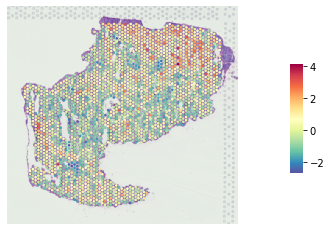

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


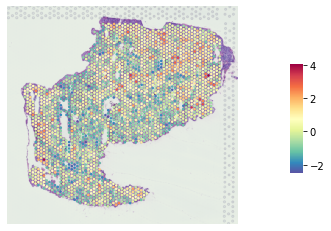

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


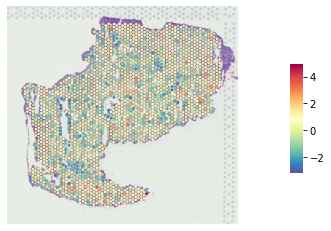

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


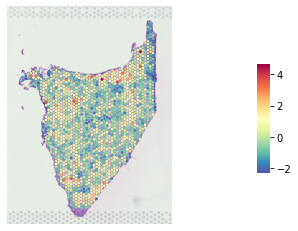

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


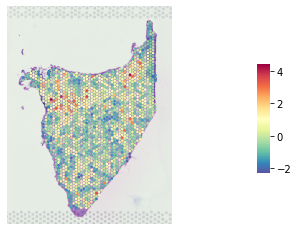

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


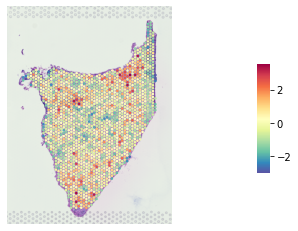

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


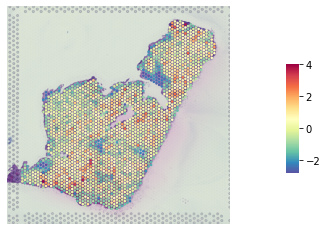

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


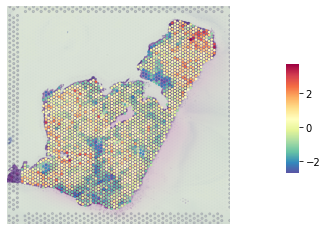

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


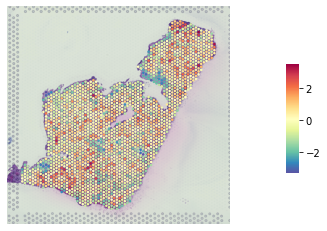

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


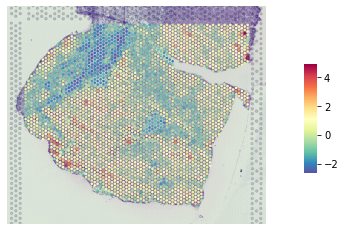

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


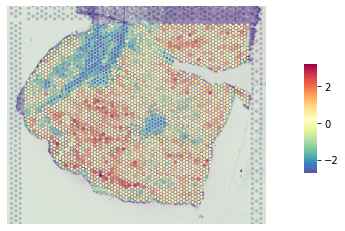

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


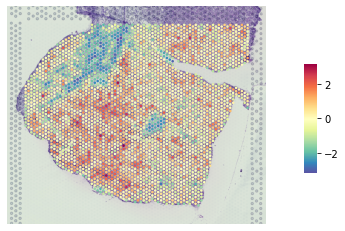

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


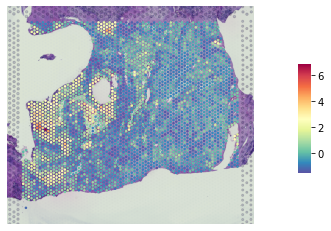

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


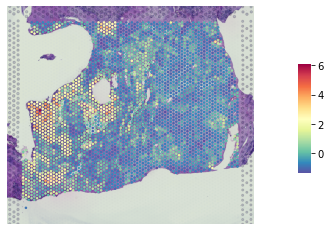

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


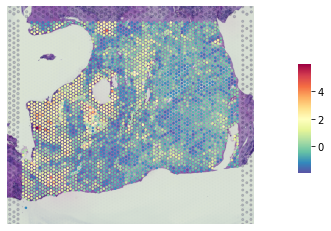

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


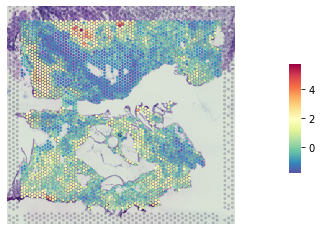

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


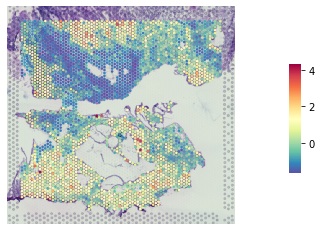

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


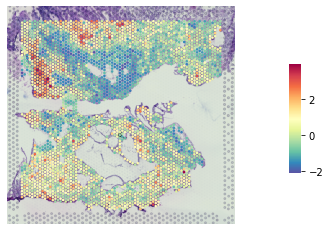

<Figure size 432x288 with 0 Axes>

In [19]:
for i in PATH_PRED.glob("./pred*"):
    sample = i.stem.split("pred_")[1]
    adata = ad.read_h5ad(i)
    adata.X = adata.to_df().apply(zscore)
    for gene in gene_to_plot:
        try:
            gene_plot(adata, genes=gene, image_scale=10, library_id=sample, 
                     output=str(OUT_PATH), name=f"pred_{sample}_{gene}.pdf")
            plt.show()
        except:
            continue

In [25]:
samples = all_adata.obs["library_id"].unique()

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


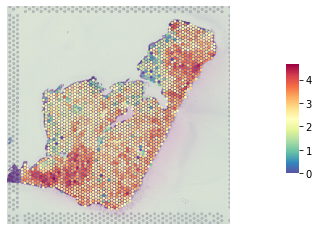

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


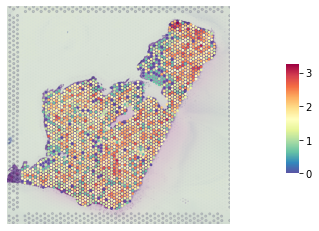

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


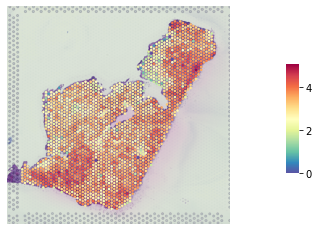

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


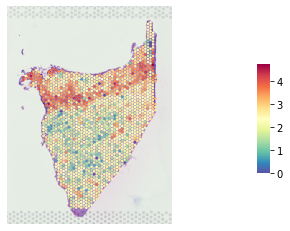

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


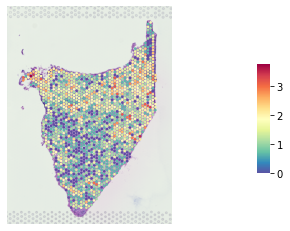

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


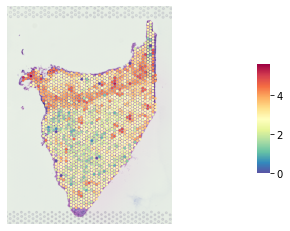

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


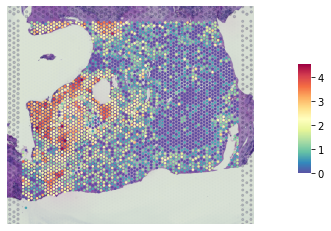

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


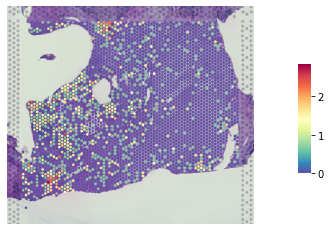

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


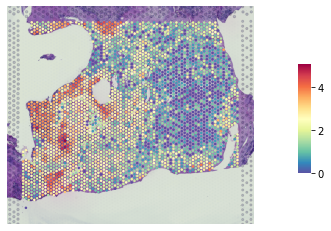

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


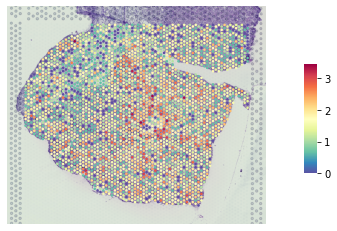

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


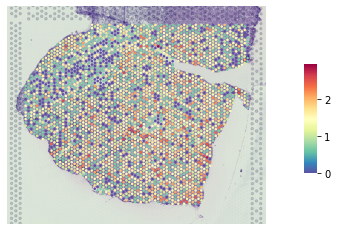

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


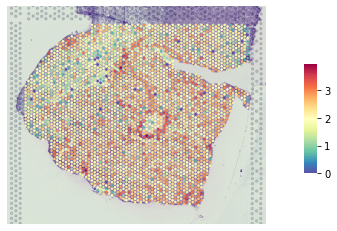

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


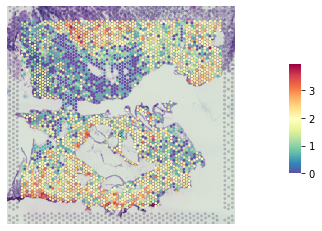

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


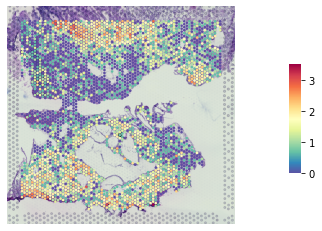

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


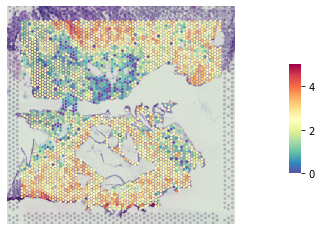

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


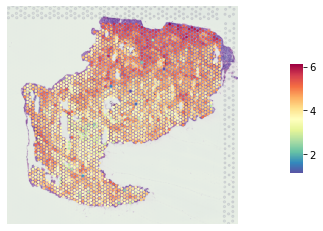

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


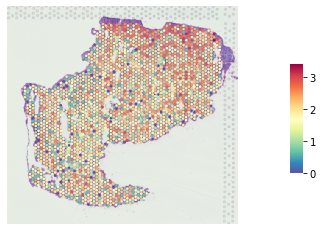

<Figure size 432x288 with 0 Axes>

/scratch/imb/Xiao/STimage/stimage/_utils.py:300: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


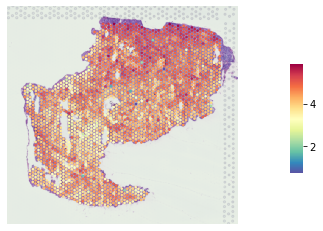

<Figure size 432x288 with 0 Axes>

In [26]:
for sample in samples:
    adata = all_adata[all_adata.obs["library_id"] == sample]
    # adata.X = adata.to_df().apply(zscore)
    for gene in gene_to_plot:
        try:
            gene_plot(adata, genes=gene, image_scale=10, library_id=sample, 
                     output=str(OUT_PATH), name=f"gc_{sample}_{gene}.pdf")
            plt.show()
        except:
            continue